# **Data Collection & Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset from Google Drive
file_path = "/content/drive/MyDrive/E Commerce Dataset (1).xlsx"
df = pd.read_excel(file_path, sheet_name="E Comm")

# Display initial dataset structure
print(f"Dataset Shape: {df.shape}")
df.head()



Dataset Shape: (5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


**Handling Missing Data**

In [ ]:
# Check for missing values
missing_data = df.isnull().sum()
print(f"Missing Data:\n{missing_data}")



Missing Data:
CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [ ]:
df_cleaned = df.dropna()
print(f"New Dataset Shape: {df_cleaned.shape}")

df_cleaned = df.dropna(how='any')  # Removes any row with at least one missing value
print(f"New Dataset Shape After Forced Dropping: {df_cleaned.shape}")

# Confirm no missing values remain
print("Missing Data After Dropping Rows:\n", df_cleaned.isnull().sum())


New Dataset Shape: (3774, 20)
New Dataset Shape After Forced Dropping: (3774, 20)
Missing Data After Dropping Rows:
 CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


**Feature Engineering**

In [ ]:
# Feature 1: Session Duration & Click Counts (Using df_cleaned)

# Create 'Session Engagement' feature using df_cleaned with .loc to avoid SettingWithCopyWarning
df_cleaned.loc[:, "SessionEngagement"] = df_cleaned["HourSpendOnApp"] * df_cleaned["NumberOfDeviceRegistered"]

# Ensure no missing values in the new feature
df_cleaned.loc[:, "SessionEngagement"] = df_cleaned["SessionEngagement"].fillna(0)

# Display dataset with new feature
print("Session Engagement:")
print(df_cleaned[['SessionEngagement']].head())





Session Engagement:
    SessionEngagement
0                 9.0
3                 8.0
5                15.0
11               12.0
12                6.0


<ipython-input-6-5d1d5abb2e85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, "SessionEngagement"] = df_cleaned["HourSpendOnApp"] * df_cleaned["NumberOfDeviceRegistered"]


In [ ]:
# Feature 2: Cart Abandonment Rate (Using df_cleaned)

# Replace NaN in CouponUsed with 0 (assumes no coupons were used)
df_cleaned.loc[:, "CouponUsed"] = df_cleaned["CouponUsed"].fillna(0)

# Compute Cart Abandonment Rate
df_cleaned.loc[:, "CartAbandonmentRate"] = 1 - (df_cleaned["OrderCount"] / (df_cleaned["OrderCount"] + df_cleaned["CouponUsed"]))

# Replace NaNs (created by division) with 0 (assumes no abandonment if no orders)
df_cleaned.loc[:, "CartAbandonmentRate"] = df_cleaned["CartAbandonmentRate"].fillna(0)

# Ensure values are within range (0 to 1)
df_cleaned.loc[:, "CartAbandonmentRate"] = df_cleaned["CartAbandonmentRate"].clip(0, 1)

# Display dataset
print(df_cleaned[["OrderCount", "CouponUsed", "CartAbandonmentRate"]].head())



    OrderCount  CouponUsed  CartAbandonmentRate
0          1.0         1.0                  0.5
3          1.0         0.0                  0.0
5          6.0         4.0                  0.4
11         1.0         0.0                  0.0
12         2.0         2.0                  0.5


<ipython-input-7-0218a8c351a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, "CartAbandonmentRate"] = 1 - (df_cleaned["OrderCount"] / (df_cleaned["OrderCount"] + df_cleaned["CouponUsed"]))


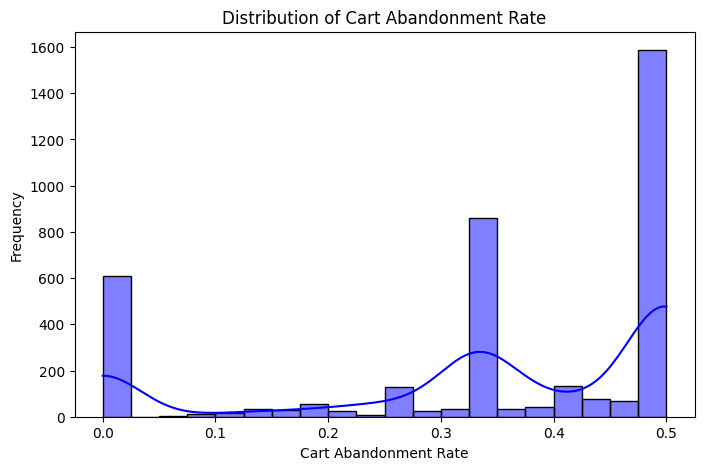

count    3774.000000
mean        0.346469
std         0.178098
min         0.000000
25%         0.300000
50%         0.375000
75%         0.500000
max         0.500000
Name: CartAbandonmentRate, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_cleaned["CartAbandonmentRate"], kde=True, bins=20, color="blue")
plt.title("Distribution of Cart Abandonment Rate")
plt.xlabel("Cart Abandonment Rate")
plt.ylabel("Frequency")
plt.show()

print(df_cleaned["CartAbandonmentRate"].describe())


In [ ]:
# Feature 3: Customer Lifetime Value (CLV)

# Create a deep copy to avoid SettingWithCopyWarning
df_cleaned = df_cleaned.copy()

# Compute CLV
df_cleaned["CLV"] = df_cleaned["OrderAmountHikeFromlastYear"] * df_cleaned["OrderCount"]

# Display the new feature
print("Customer Lifetime Value (CLV):")
print(df_cleaned[['CLV']].head())



Customer Lifetime Value (CLV):
      CLV
0    11.0
3    23.0
5   132.0
11   13.0
12   26.0


Order Recency & Frequency:
    OrderRecency  OrderFrequency
0            5.0             1.0
3            3.0             1.0
5            7.0             6.0
11           0.0             1.0
12           2.0             2.0


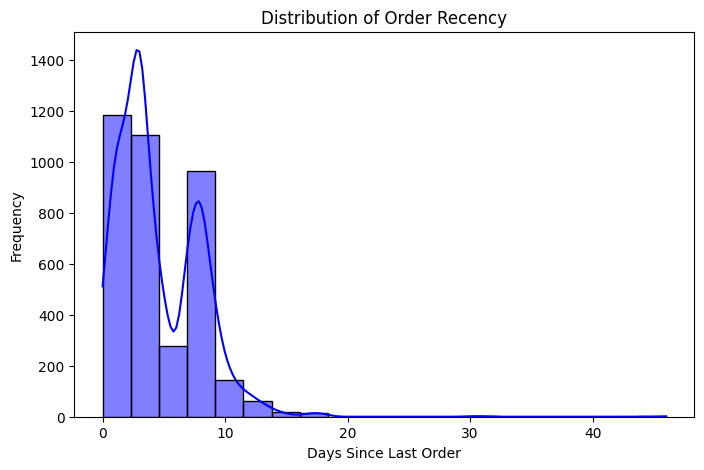

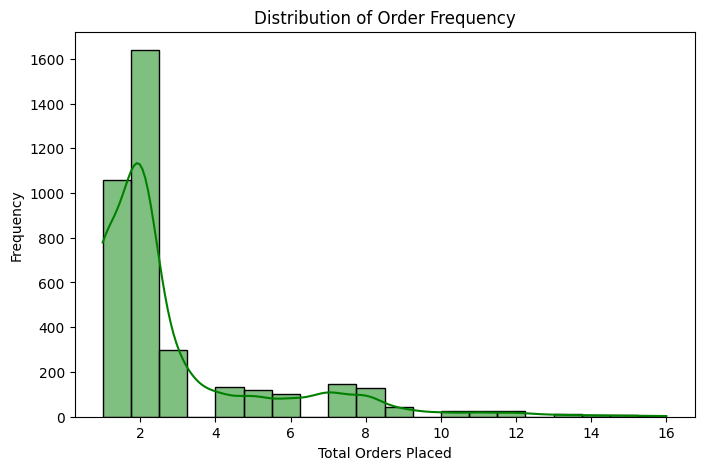

In [ ]:
# Feature 4: Order Recency & Frequency (Using df_cleaned)

# Ensure df_cleaned is a safe copy
df_cleaned = df_cleaned.copy()

# Order Recency: Days since the last order
df_cleaned["OrderRecency"] = df_cleaned["DaySinceLastOrder"]

# Order Frequency: Total number of orders placed by the customer
df_cleaned["OrderFrequency"] = df_cleaned["OrderCount"]

# Display the new features
print("Order Recency & Frequency:")
print(df_cleaned[['OrderRecency', 'OrderFrequency']].head())

import matplotlib.pyplot as plt
import seaborn as sns

# Plot Order Recency
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned["OrderRecency"], kde=True, bins=20, color="blue")
plt.title("Distribution of Order Recency")
plt.xlabel("Days Since Last Order")
plt.ylabel("Frequency")
plt.show()

# Plot Order Frequency
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned["OrderFrequency"], kde=True, bins=20, color="green")
plt.title("Distribution of Order Frequency")
plt.xlabel("Total Orders Placed")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Feature 5: Monetary (M) - Total amount spent by the customer (Using df_cleaned)

# Ensure df_cleaned is a safe copy
df_cleaned = df_cleaned.copy()

# Assign Monetary feature
df_cleaned["Monetary"] = df_cleaned["OrderAmountHikeFromlastYear"]

# Display the new feature
print("Monetary (M) Feature:")
print(df_cleaned[['CustomerID', 'Monetary']].head())



Monetary (M) Feature:
    CustomerID  Monetary
0        50001      11.0
3        50004      23.0
5        50006      22.0
11       50012      13.0
12       50013      13.0


#  Section 2: Exploratory Data Analysis (EDA)

**Descriptive Statistics**

In [ ]:
# Quick Summary Statistics

# Summary statistics for numerical features
print("📊 Numerical Summary Statistics:")
print(df_cleaned.describe())

# Summary statistics for categorical features
print("\n📊 Categorical Summary:")
print(df_cleaned.describe(include=['O']))

# Checking Missing Values in df_cleaned
print("\n🔍 Checking Missing Values in Dataset:")
print(df_cleaned.isnull().sum())


📊 Numerical Summary Statistics:
         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   3774.000000  3774.000000  3774.000000  3774.000000      3774.000000   
mean   53017.994966     0.167197     8.776895     1.707737        15.743773   
std     1608.979289     0.373201     7.678508     0.936725         8.594330   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51656.250000     0.000000     1.000000     1.000000         9.000000   
50%    53160.500000     0.000000     8.000000     1.000000        14.000000   
75%    54394.500000     0.000000    13.000000     3.000000        21.000000   
max    55630.000000     1.000000    51.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     3774.000000               3774.000000        3774.000000   
mean         2.981187                  3.754107           3.056439   
std          0.722158                  1.02523

Distribution of Numerical Variables

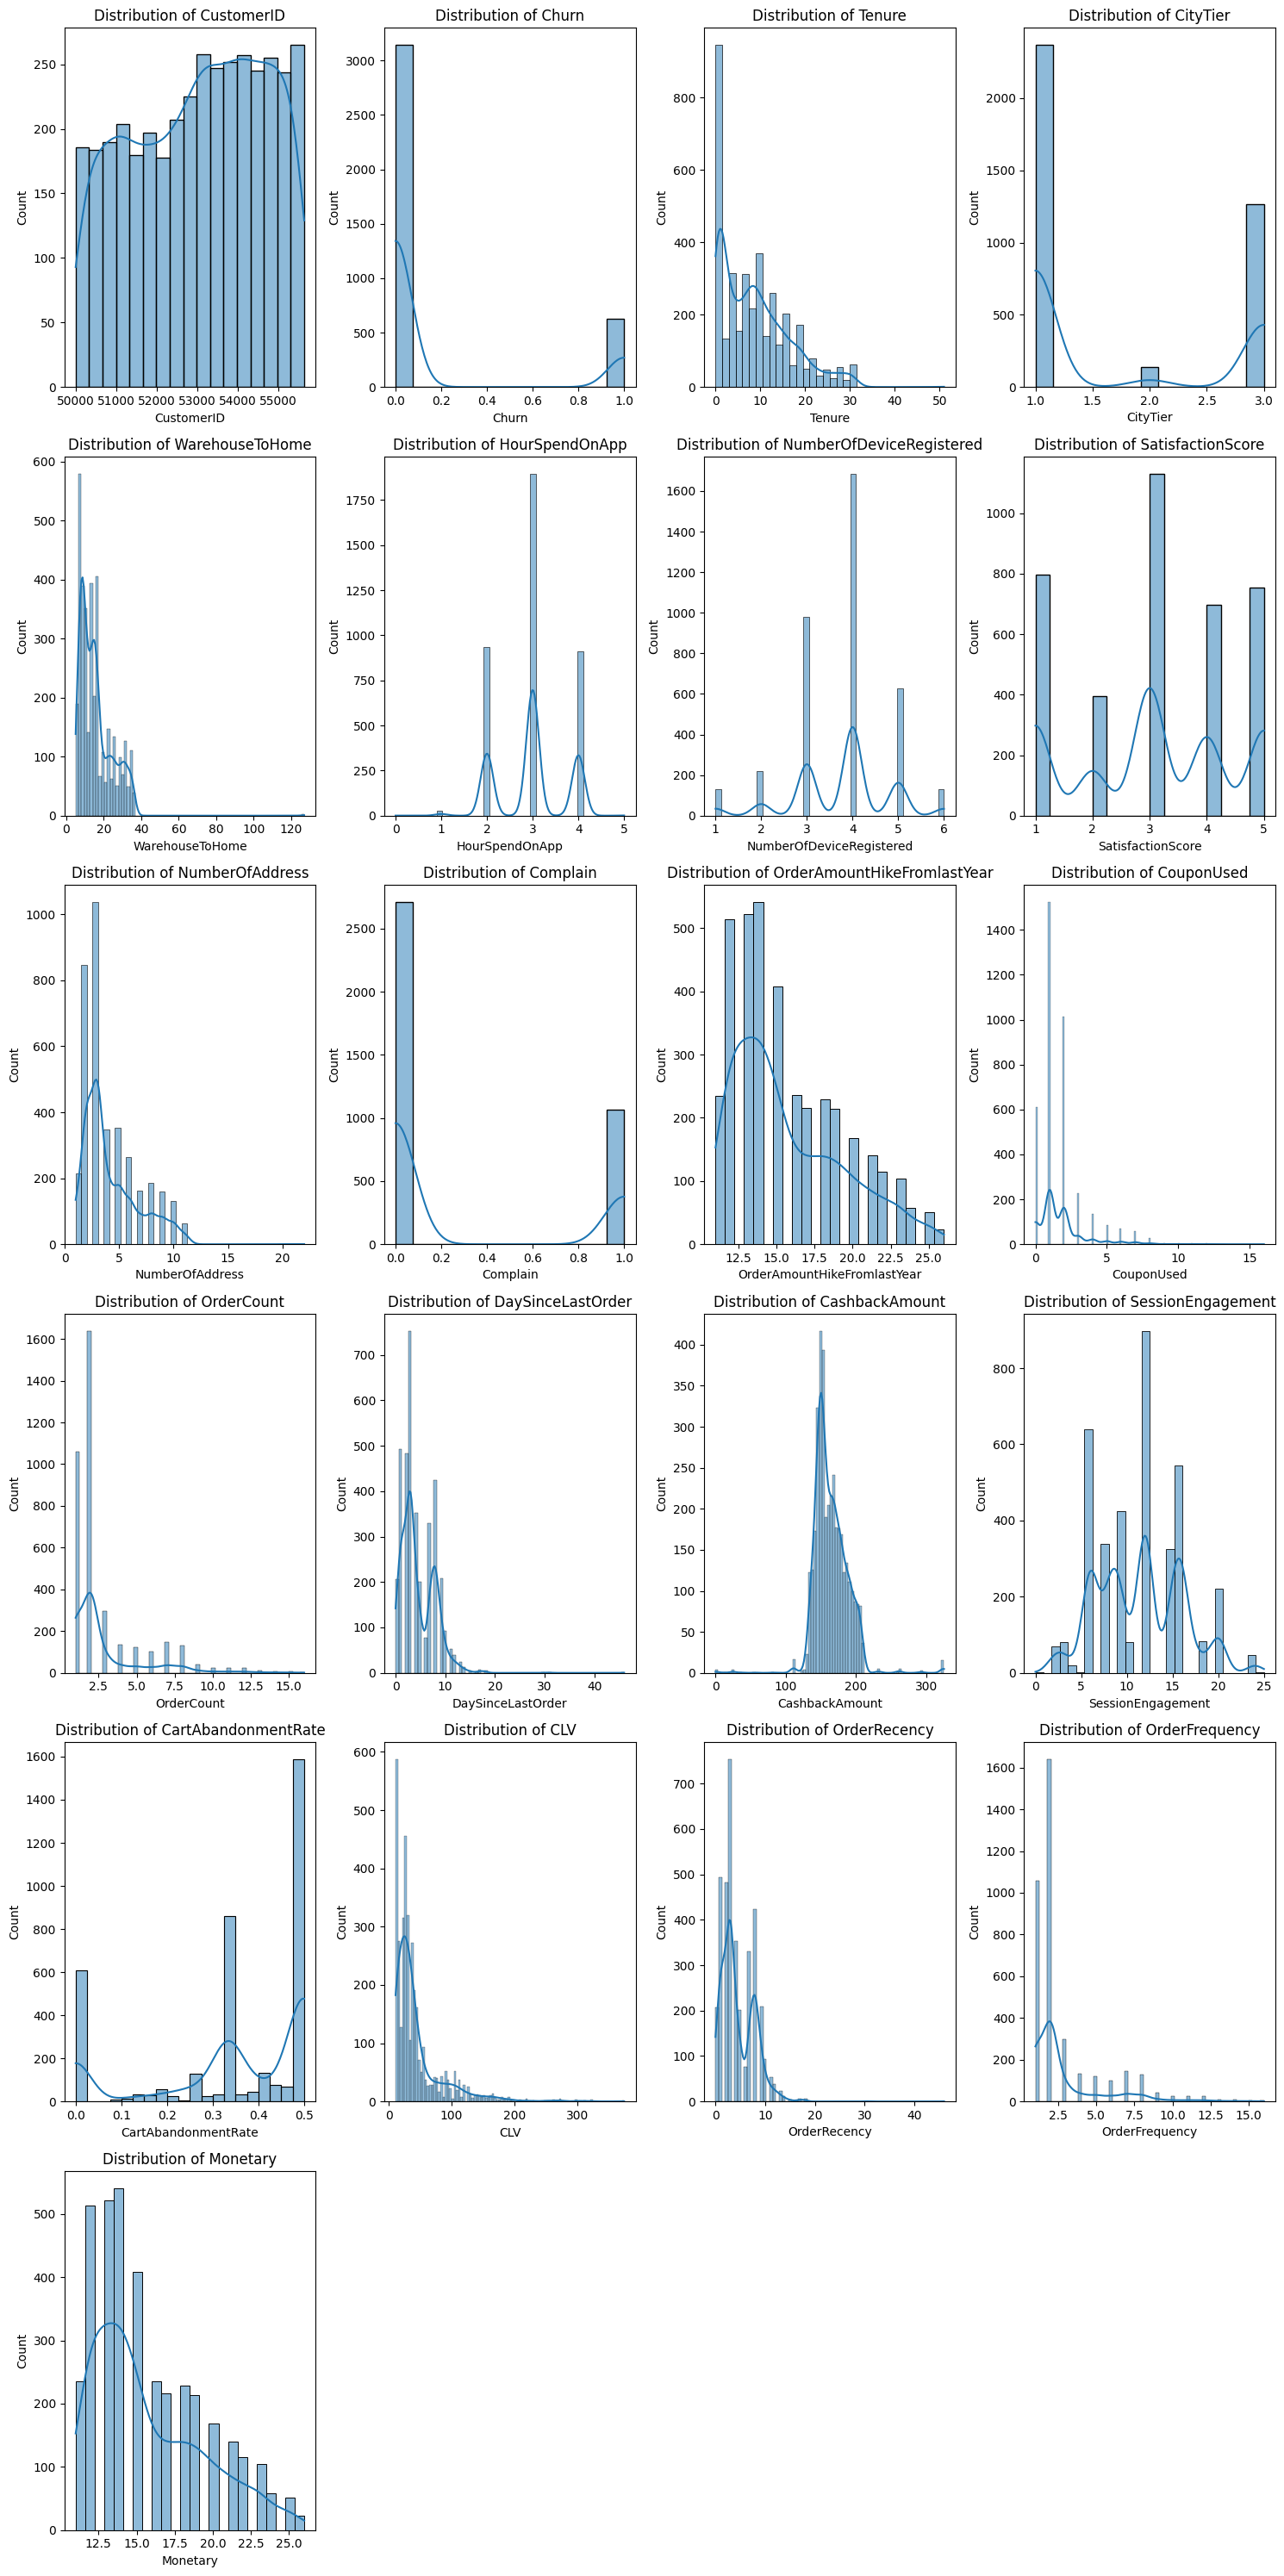

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of numerical columns to analyze
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns based on the number of numerical features
n_cols = 4  # Number of columns for subplots
n_rows = int(np.ceil(len(numerical_columns) / n_cols))  # Calculate the required number of rows

# Create subplots dynamically
plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Adjust the subplot layout
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


Correlation Analysis

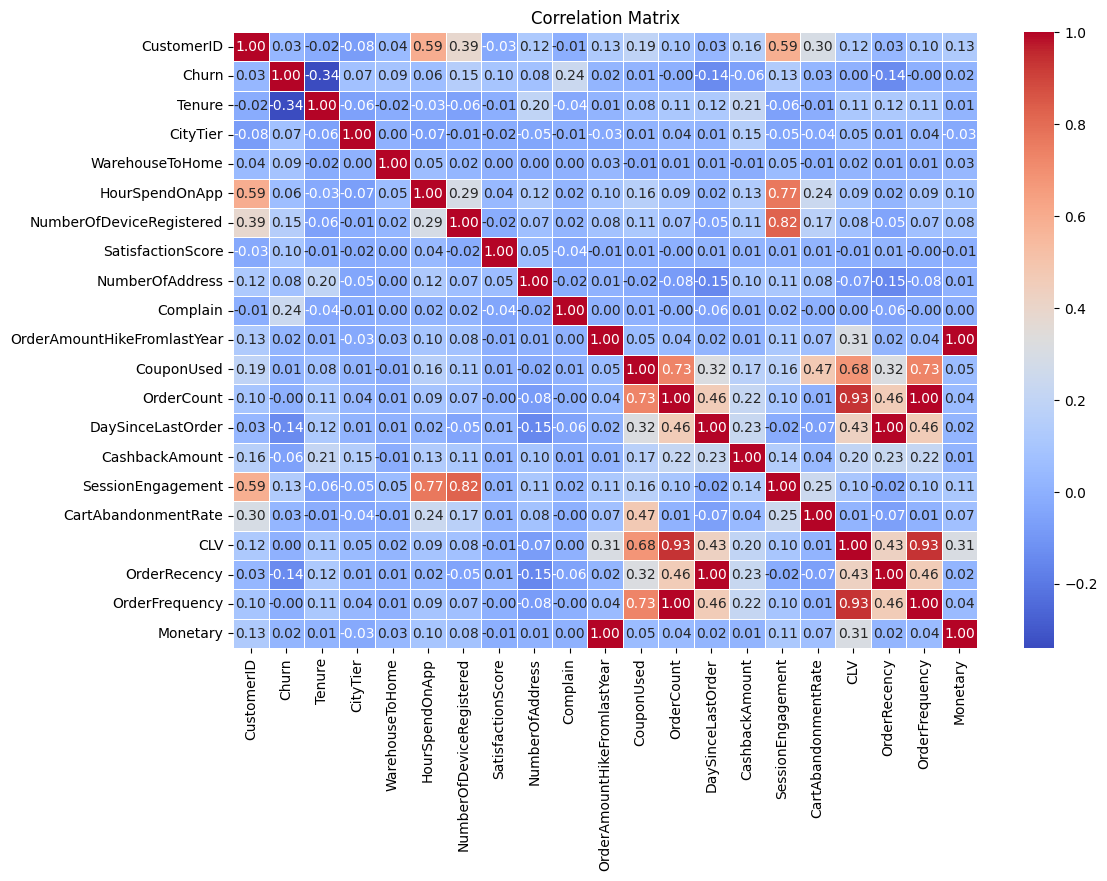

In [ ]:
# Select only numerical columns for correlation analysis
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Compute correlation matrix on numerical columns
correlation_matrix = df_cleaned[numerical_columns].corr()

# Plot heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()




Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy cleaned dataset to avoid modifying the original
df_cleaned_encoded = df_cleaned.copy()

# Separate numerical and categorical features
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns.drop('Churn')
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Encode categorical features
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned_encoded[col] = le.fit_transform(df_cleaned_encoded[col])
    label_encoders[col] = le  # Save encoders if needed later

# Target variable
X = df_cleaned_encoded.drop(columns=['Churn'])
y = df_cleaned_encoded['Churn']

# ✅ Automatically adjust `k` to avoid selection errors
k_num = min(10, len(numerical_columns))  # Select up to 10 numerical features or the max available
k_cat = min(5, len(categorical_columns))  # Select up to 5 categorical features or the max available

# Feature selection for numerical features (Mutual Information)
mi_selector = SelectKBest(score_func=mutual_info_classif, k=k_num)
X_num_selected = mi_selector.fit_transform(df_cleaned_encoded[numerical_columns], y)
selected_numerical_features = numerical_columns[mi_selector.get_support()]

# Feature selection for categorical features (Chi-Square)
chi2_selector = SelectKBest(score_func=chi2, k=k_cat)
X_cat_selected = chi2_selector.fit_transform(df_cleaned_encoded[categorical_columns], y)
selected_categorical_features = categorical_columns[chi2_selector.get_support()]

# Combine selected features
selected_features = list(selected_numerical_features) + list(selected_categorical_features)

# Filter dataset with selected features
X_selected = df_cleaned_encoded[selected_features]

# Verify the selection
print(f"Final selected numerical features: {selected_numerical_features}")
print(f"Final selected categorical features: {selected_categorical_features}")
print(f"X_selected shape: {X_selected.shape}")


Final selected numerical features: Index(['CustomerID', 'Tenure', 'WarehouseToHome', 'Complain',
       'DaySinceLastOrder', 'CashbackAmount', 'CartAbandonmentRate', 'CLV',
       'OrderRecency', 'OrderFrequency'],
      dtype='object')
Final selected categorical features: Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')
X_selected shape: (3774, 15)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Verify split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (3019, 15)
X_test shape: (755, 15)
y_train shape: (3019,)
y_test shape: (755,)


**Behavioral Trends:**

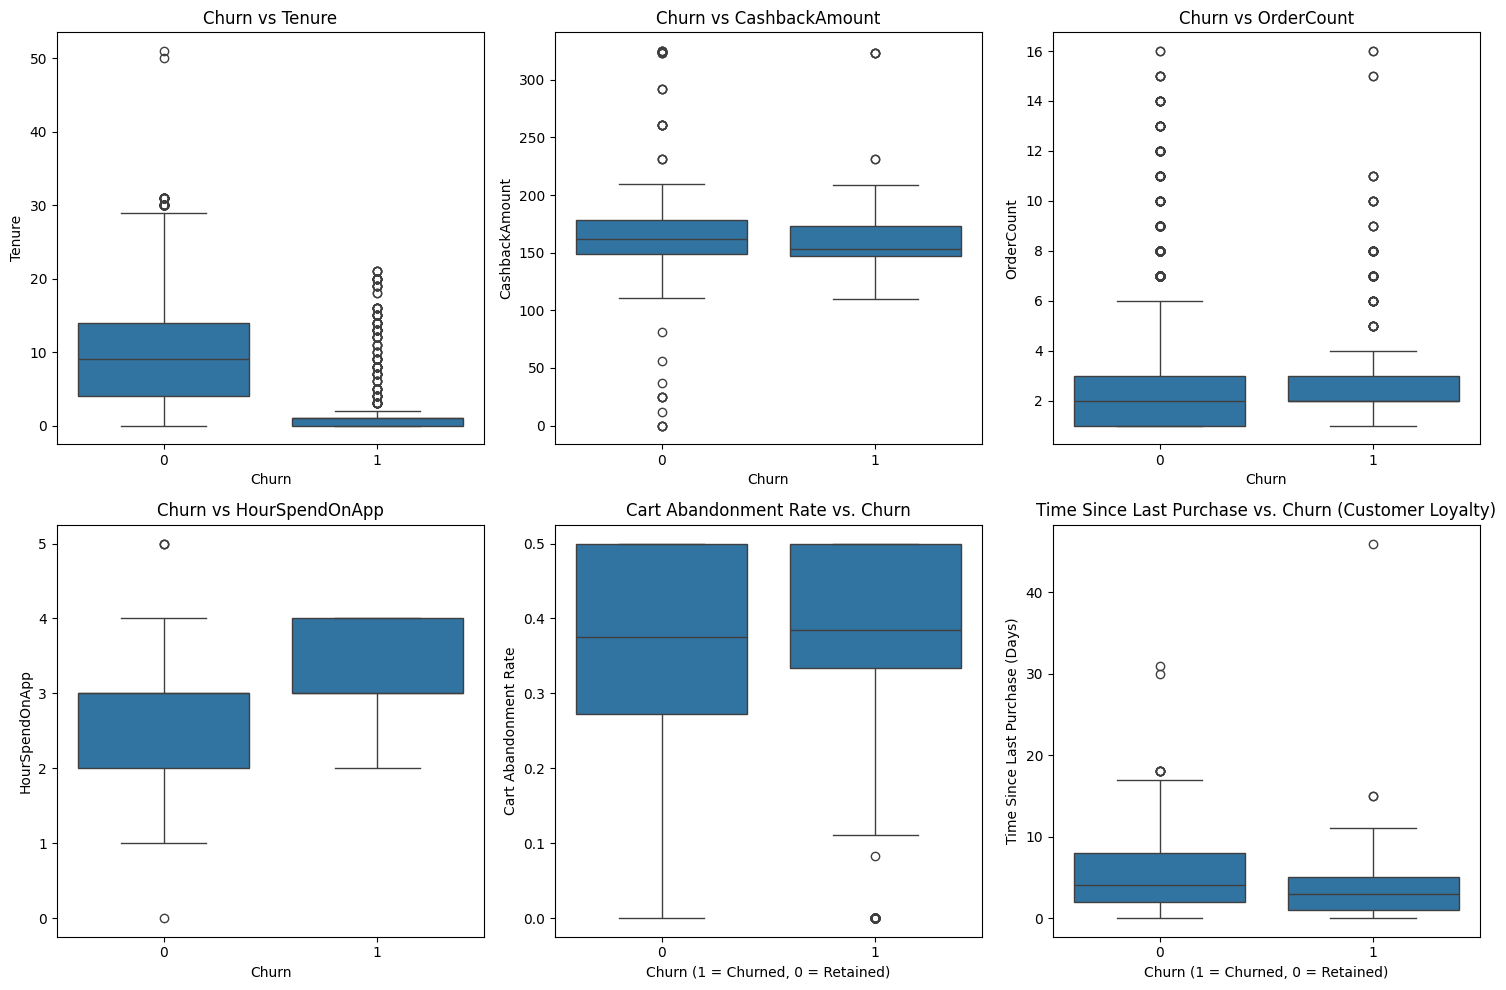

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to analyze for Churn behavior
churn_features = ["Tenure", "CashbackAmount", "OrderCount", "HourSpendOnApp"]

# Set up the figure and plot size for the churn vs features boxplots
plt.figure(figsize=(15, 10))  # Adjusting the overall size of the plots

# Loop through features and create boxplots for each feature vs churn status
for i, col in enumerate(churn_features, 1):
    plt.subplot(2, 3, i)  # 2x3 grid for the plots (2 rows, 3 columns)
    sns.boxplot(x=df_cleaned["Churn"], y=df_cleaned[col])  # Boxplot for each feature vs churn status
    plt.title(f'Churn vs {col}')  # Title for each plot

# Plot for Cart Abandonment Rate vs Churn status in the 5th subplot position
plt.subplot(2, 3, 5)
sns.boxplot(x=df_cleaned["Churn"], y=df_cleaned["CartAbandonmentRate"])
plt.title('Cart Abandonment Rate vs. Churn')
plt.xlabel('Churn (1 = Churned, 0 = Retained)')
plt.ylabel('Cart Abandonment Rate')

# Plot for Time Since Last Purchase (Recency) vs Churn (Customer Loyalty) in the 6th subplot position
plt.subplot(2, 3, 6)
sns.boxplot(x=df_cleaned["Churn"], y=df_cleaned["DaySinceLastOrder"])
plt.title('Time Since Last Purchase vs. Churn (Customer Loyalty)')
plt.xlabel('Churn (1 = Churned, 0 = Retained)')
plt.ylabel('Time Since Last Purchase (Days)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


# Section 3: Churn Prediction Modeling

Step 1: Logistic Regression Model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC

# Evaluate
log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)
log_auc = roc_auc_score(y_test, y_proba_log)

# Print results
print("🔹 Logistic Regression Performance Metrics:")
print(f"{'Metric':<12} {'Score':>8}")
print("-" * 22)
print(f"{'Accuracy':<12}: {log_accuracy:.4f}")
print(f"{'Precision':<12}: {log_precision:.4f}")
print(f"{'Recall':<12}: {log_recall:.4f}")
print(f"{'F1-score':<12}: {log_f1:.4f}")
print(f"{'AUC-ROC':<12}: {log_auc:.4f}")


🔹 Logistic Regression Performance Metrics:
Metric          Score
----------------------
Accuracy    : 0.8623
Precision   : 0.6964
Recall      : 0.3095
F1-score    : 0.4286
AUC-ROC     : 0.8311


Step 2: Hyperparameter Tuning using GridSearchCV

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data and preprocess
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target

# Convert categorical columns to numeric (One-Hot Encoding)
X_encoded = pd.get_dummies(X)

# Handle missing values (fill with mean for numerical columns)
X_encoded.fillna(X_encoded.mean(), inplace=True)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Feature Selection using L1 Regularization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale features before selection

# Apply L1 Regularization for Feature Selection
feature_selector = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=1000)
feature_selector.fit(X_train_scaled, y_train)

# Get selected feature mask
selected_mask = np.abs(feature_selector.coef_[0]) > 1e-5  # Small threshold to filter near-zero weights
selected_features = X_train.columns[selected_mask]

# Apply feature selection to both train & test
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Scale selected features
scaler = StandardScaler()
X_train_scaled_selected = scaler.fit_transform(X_train_selected)
X_test_scaled_selected = scaler.transform(X_test_selected)

# Train Logistic Regression with Balanced Weights
logreg = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000, solver='liblinear')

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Adjust regularization strength
    'penalty': ['l2'],  # L2 Regularization for model stability
    'max_iter': [1000]
}

# GridSearchCV with balanced accuracy scoring
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled_selected, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test_scaled_selected)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
y_prob = best_model.predict_proba(X_test_scaled_selected)[:, 1]
auc_roc_score = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Results
print(f" Best Hyperparameters: {grid_search.best_params_}")
print(f" Accuracy: {accuracy:.4f}")
print(" Classification Report:")
print(class_report)
print(f" AUC-ROC Score: {auc_roc_score:.4f}")
print(" Confusion Matrix:")
print(conf_matrix)


 Best Hyperparameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
 Accuracy: 0.8659
 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       936
           1       0.59      0.69      0.64       190

    accuracy                           0.87      1126
   macro avg       0.76      0.80      0.78      1126
weighted avg       0.88      0.87      0.87      1126

 AUC-ROC Score: 0.8844
 Confusion Matrix:
[[843  93]
 [ 58 132]]


Random Forest Model

In [ ]:
# **Ensure X_test has the same features as X_train before scaling**
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# **Now apply StandardScaler()**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Convert scaled arrays back to DataFrames**
X_train_rf = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_rf = pd.DataFrame(X_test_scaled, columns=X_train.columns)  # ✅ Use same column names


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from scipy.stats import randint

# **Ensure you're using the preprocessed dataset**
X_train_rf = X_train_scaled  # Use preprocessed training set
X_test_rf = X_test_scaled  # Use preprocessed test set

# Train Initial Random Forest Model**
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_rf, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_rf)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
y_prob_rf = rf.predict_proba(X_test_rf)[:, 1]
auc_roc_score_rf = roc_auc_score(y_test, y_prob_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print Initial Model Performance
print(f"🔹 Initial Random Forest Accuracy: {accuracy_rf:.4f}")
print("🔹 Initial Classification Report:")
print(class_report_rf)
print(f"🔹 Initial AUC-ROC Score: {auc_roc_score_rf:.4f}")
print("🔹 Initial Confusion Matrix:")
print(conf_matrix_rf)

# Hyperparameter Tuning with RandomizedSearchCV**
param_dist = {
    'n_estimators': randint(100, 300),  # Choose number of trees between 100 and 300
    'max_depth': [10, 20, 30, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split nodes
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in leaf nodes
    'max_features': ['sqrt', 'log2']  # Feature selection strategies
}

# Initialize Random Forest model
rf_tuned = RandomForestClassifier(random_state=42)

# Setup RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_tuned,
    param_distributions=param_dist,
    n_iter=10,  # Run 10 different random configurations
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all processors
    verbose=1,
    random_state=42
)

# Fit the RandomizedSearchCV model
random_search_rf.fit(X_train_rf, y_train)

# Get the best model
best_rf_model = random_search_rf.best_estimator_

#  Evaluate the Best Tuned Random Forest Model**
y_pred_rf_best = best_rf_model.predict(X_test_rf)

# Evaluate the best model
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
class_report_rf_best = classification_report(y_test, y_pred_rf_best)
y_prob_rf_best = best_rf_model.predict_proba(X_test_rf)[:, 1]
auc_roc_score_rf_best = roc_auc_score(y_test, y_prob_rf_best)
conf_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)

# Print Tuned Model Performance
print(f"\n Random Forest Hyperparameters:** {random_search_rf.best_params_}")
print(f"Random Forest Accuracy: {accuracy_rf_best:.4f}")
print("Classification Report:")
print(class_report_rf_best)
print(f"AUC-ROC Score: {auc_roc_score_rf_best:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf_best)


🔹 Initial Random Forest Accuracy: 0.9645
🔹 Initial Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       936
           1       0.97      0.82      0.89       190

    accuracy                           0.96      1126
   macro avg       0.97      0.91      0.93      1126
weighted avg       0.96      0.96      0.96      1126

🔹 Initial AUC-ROC Score: 0.9970
🔹 Initial Confusion Matrix:
[[931   5]
 [ 35 155]]
Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Random Forest Hyperparameters:** {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 158}
Random Forest Accuracy: 0.9645
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       936
           1       0.99      0.80      0.88       190

    accuracy                           0.96      1126
   macro avg       0.97      0.90     

XGBoost

In [ ]:
pip install xgboost


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Train Initial XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
auc_roc_xgb = roc_auc_score(y_test, y_prob_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print Initial Model Performance
print(f"Initial XGBoost Accuracy: {accuracy_xgb:.4f}")
print("Initial Classification Report:")
print(class_report_xgb)
print(f"Initial AUC-ROC Score: {auc_roc_xgb:.4f}")
print("Initial Confusion Matrix:")
print(conf_matrix_xgb)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost model
xgb_tuned = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Setup GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_tuned,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='roc_auc'
)

# Fit the GridSearchCV model
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best model
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate the Best Tuned XGBoost Model
y_pred_xgb_best = best_xgb_model.predict(X_test_scaled)

# Evaluate the best model
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
class_report_xgb_best = classification_report(y_test, y_pred_xgb_best)
y_prob_xgb_best = best_xgb_model.predict_proba(X_test_scaled)[:, 1]
auc_roc_xgb_best = roc_auc_score(y_test, y_prob_xgb_best)
conf_matrix_xgb_best = confusion_matrix(y_test, y_pred_xgb_best)

# Print Tuned Model Performance
print(f"\nBest XGBoost Hyperparameters: {grid_search_xgb.best_params_}")
print(f"Best XGBoost Accuracy: {accuracy_xgb_best:.4f}")
print("Best Classification Report:")
print(class_report_xgb_best)
print(f"Best AUC-ROC Score: {auc_roc_xgb_best:.4f}")
print("Best Confusion Matrix:")
print(conf_matrix_xgb_best)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:15:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Initial XGBoost Accuracy: 0.9813
Initial Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       936
           1       0.97      0.92      0.94       190

    accuracy                           0.98      1126
   macro avg       0.98      0.96      0.97      1126
weighted avg       0.98      0.98      0.98      1126

Initial AUC-ROC Score: 0.9969
Initial Confusion Matrix:
[[930   6]
 [ 15 175]]
Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:17:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best XGBoost Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best XGBoost Accuracy: 0.9831
Best Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.97      0.93      0.95       190

    accuracy                           0.98      1126
   macro avg       0.98      0.96      0.97      1126
weighted avg       0.98      0.98      0.98      1126

Best AUC-ROC Score: 0.9969
Best Confusion Matrix:
[[930   6]
 [ 13 177]]


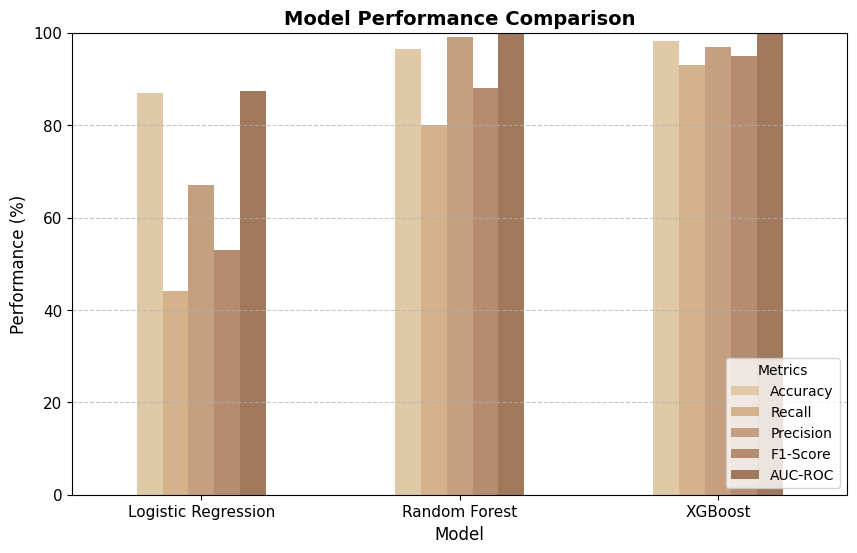

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Model performance results
model_results = {
    "Logistic Regression": {
        "Accuracy": 87.02,
        "Recall": 44.00,
        "Precision": 67.00,
        "F1-Score": 53.00,
        "AUC-ROC": 87.40
    },
    "Random Forest": {
        "Accuracy": 96.45,
        "Recall": 80.00,
        "Precision": 99.00,
        "F1-Score": 88.00,
        "AUC-ROC": 99.75
    },
    "XGBoost": {
        "Accuracy": 98.31,
        "Recall": 93.00,
        "Precision": 97.00,
        "F1-Score": 95.00,
        "AUC-ROC": 99.69
    }
}

# Convert model results to a DataFrame
df_performance = pd.DataFrame(model_results).T

# Plot model performance comparison
fig, ax = plt.subplots(figsize=(10, 6))
df_performance.plot(kind="bar", ax=ax, color=["#e0c9a6", "#d4b28c", "#c4a080", "#b38c72", "#a0785c"])

# Formatting the chart
plt.title("Model Performance Comparison", fontsize=14, fontweight="bold")
plt.ylabel("Performance (%)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 100)  # Full percentage scale
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Metrics", loc="lower right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


Feature Importance Analysis:

In [ ]:
# Install SHAP library
!pip install shap

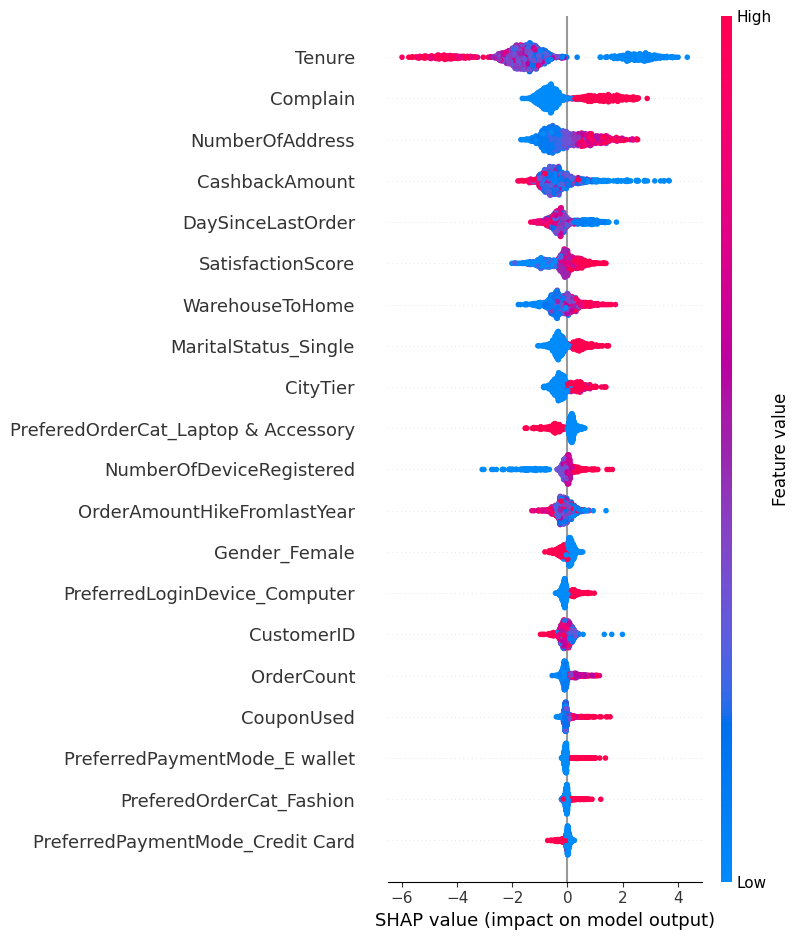

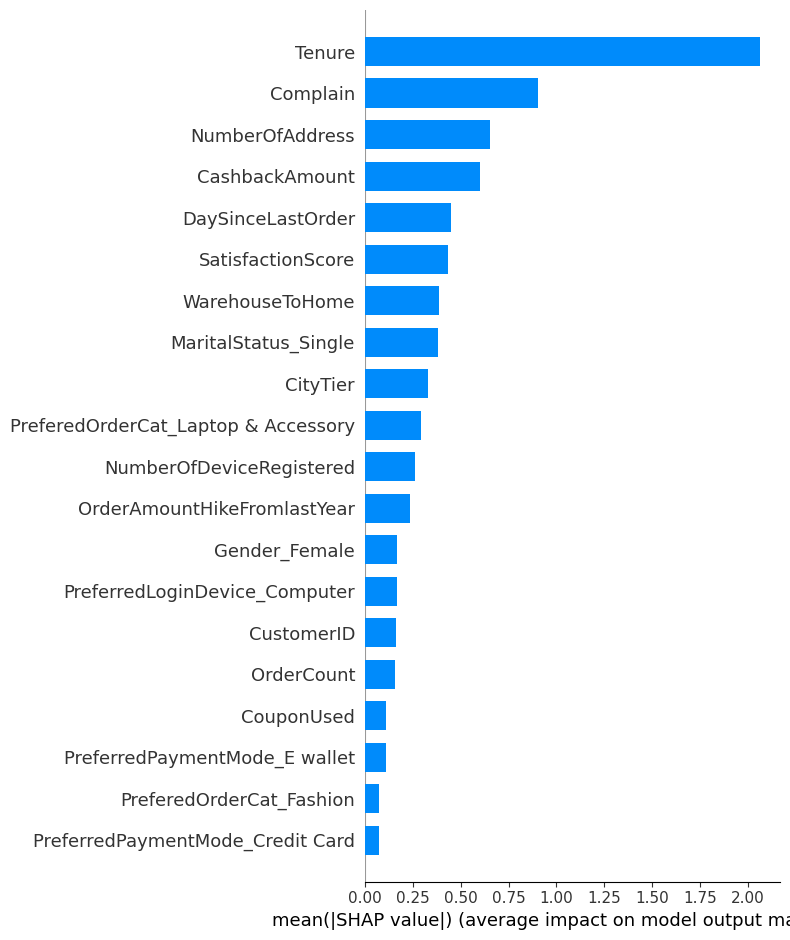

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Convert X_test_scaled back to a DataFrame
X_test_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Use TreeExplainer for XGBoost
shap_explainer = shap.TreeExplainer(best_xgb_model)
shap_values = shap_explainer.shap_values(X_test_df)

#  SHAP Summary Plot (Feature Importance)**
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_df, feature_names=X_train.columns)

#  SHAP Bar Plot (Average Impact of Features)**
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_df, plot_type="bar", feature_names=X_train.columns)

#  SHAP Force Plot for First Prediction**
shap.initjs()
shap.force_plot(shap_explainer.expected_value, shap_values[0], X_test_df.iloc[0], feature_names=X_train.columns)


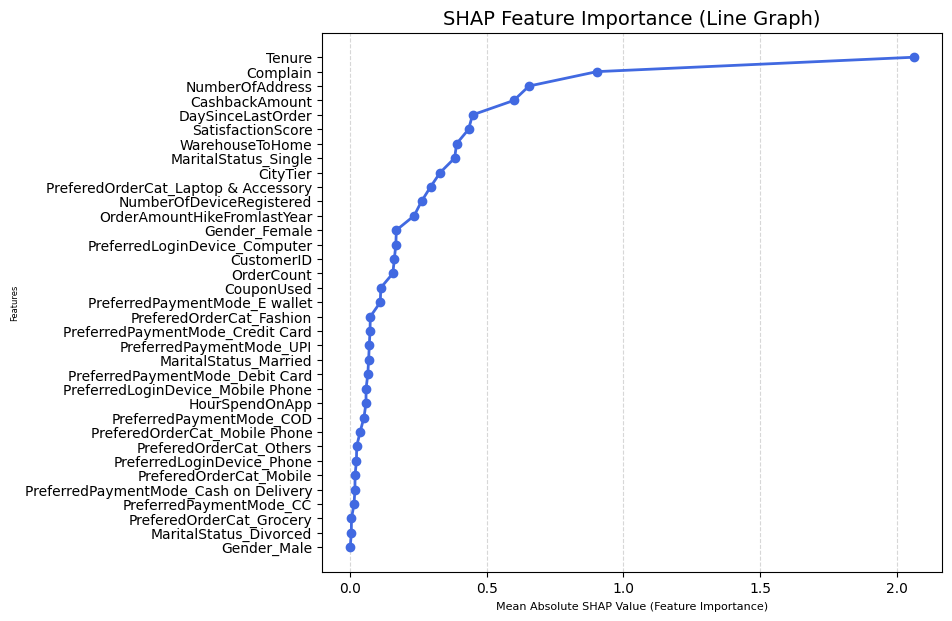

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute mean absolute SHAP values
shap_importance = np.abs(shap_values).mean(axis=0)

# Get feature names directly from X_train
feature_names = X_train.columns.tolist()

# Sort features by importance
sorted_indices = np.argsort(shap_importance)
sorted_features = np.array(feature_names)[sorted_indices]
sorted_importance = shap_importance[sorted_indices]

# Plot sorted SHAP values as a line graph
plt.figure(figsize=(8, 7))
plt.plot(sorted_importance, sorted_features, marker="o", linestyle="-", color="royalblue", linewidth=2, markersize=6)

# Labels & Titles
plt.xlabel("Mean Absolute SHAP Value (Feature Importance)", fontsize=8)
plt.ylabel("Features", fontsize=6)
plt.title("SHAP Feature Importance (Line Graph)", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Show plot
plt.show()


# Customer Segmentation Using Clustering

**RFM Analysis**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# ------------------------------
# Step 1: RFM Aggregation
# ------------------------------
df_rfm = df_cleaned.groupby('CustomerID').agg({
    'DaySinceLastOrder': 'min',  # Recency
    'OrderCount': 'sum',         # Frequency
    'CLV': 'sum'                 # Monetary
})

# Rename columns
df_rfm.columns = ['Recency', 'Frequency', 'Monetary']
df_rfm = df_rfm.reset_index()  # Bring CustomerID as a column

# ------------------------------
# Step 2: Standardize RFM
# ------------------------------
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_rfm[['Recency', 'Frequency', 'Monetary']])

# ------------------------------
# Step 3: K-Means Clustering
# ------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
df_rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# ------------------------------
# Step 4: Behavioral Features Encoding
# ------------------------------
behavioral_features = df_cleaned[['PreferredLoginDevice', 'PreferredPaymentMode', 'CartAbandonmentRate']].copy()

# One-Hot Encode Device & Payment Mode
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(behavioral_features[['PreferredLoginDevice', 'PreferredPaymentMode']])
encoded_feature_names = encoder.get_feature_names_out(['PreferredLoginDevice', 'PreferredPaymentMode'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Standardize Cart Abandonment Rate
df_cleaned['CartAbandonmentRate_Scaled'] = scaler.fit_transform(df_cleaned[['CartAbandonmentRate']])

# ------------------------------
# Step 5: Combine RFM + Behavioral Features
# ------------------------------
rfm_behavior_df = pd.concat([
    df_rfm,
    encoded_df.reset_index(drop=True),
    df_cleaned[['CartAbandonmentRate_Scaled']].reset_index(drop=True)
], axis=1)

# ------------------------------
# Step 6: Merge Important Columns (Churn, Tenure, Gender, etc.)
# ------------------------------
important_cols = ['CustomerID', 'Churn', 'Tenure', 'Gender', 'SatisfactionScore',
                  'Complain', 'CityTier', 'NumberOfAddress', 'CashbackAmount',
                  'WarehouseToHome']

rfm_behavior_df = pd.merge(rfm_behavior_df, df_cleaned[important_cols], on='CustomerID', how='left')

# ------------------------------
# Step 7: Save Final Dataset
# ------------------------------
rfm_behavior_df.to_csv('customer_segments_final.csv', index=False)

print("✅ Final dataset ready!")
print(rfm_behavior_df.head())

# ------------------------------
# Step 8: Quick Cluster Profiling
# ------------------------------
cluster_profile = rfm_behavior_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Churn': 'mean',
    'Tenure': 'mean',
    'SatisfactionScore': 'mean',
    'Complain': 'mean'
})

print("\nCluster Profile Summary:")
print(cluster_profile)




✅ Final dataset ready!
   CustomerID  Recency  Frequency  Monetary  Cluster  \
0       50001      5.0        1.0      11.0        2   
1       50004      3.0        1.0      23.0        2   
2       50006      7.0        6.0     132.0        1   
3       50012      0.0        1.0      13.0        2   
4       50013      2.0        2.0      26.0        2   

   PreferredLoginDevice_Mobile Phone  PreferredLoginDevice_Phone  \
0                                1.0                         0.0   
1                                0.0                         1.0   
2                                0.0                         0.0   
3                                1.0                         0.0   
4                                0.0                         1.0   

   PreferredPaymentMode_COD  PreferredPaymentMode_Cash on Delivery  \
0                       0.0                                    0.0   
1                       0.0                                    0.0   
2                    

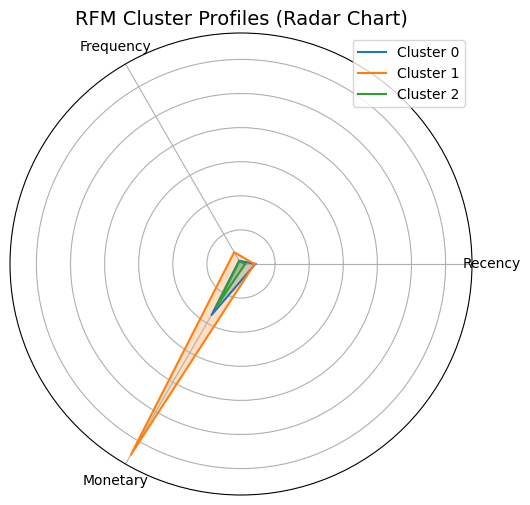

In [ ]:
#Radar Chart (RFM profiles)

labels = ['Recency', 'Frequency', 'Monetary']
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for cluster in sorted(rfm_behavior_df['Cluster'].unique()):
    values = cluster_profile.loc[cluster][labels].values
    values = np.concatenate((values, [values[0]]))  # Close circle
    ax.plot(angles + angles[:1], values, label=f'Cluster {cluster}')
    ax.fill(angles + angles[:1], values, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=10)
plt.title('RFM Cluster Profiles (Radar Chart)', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.show()

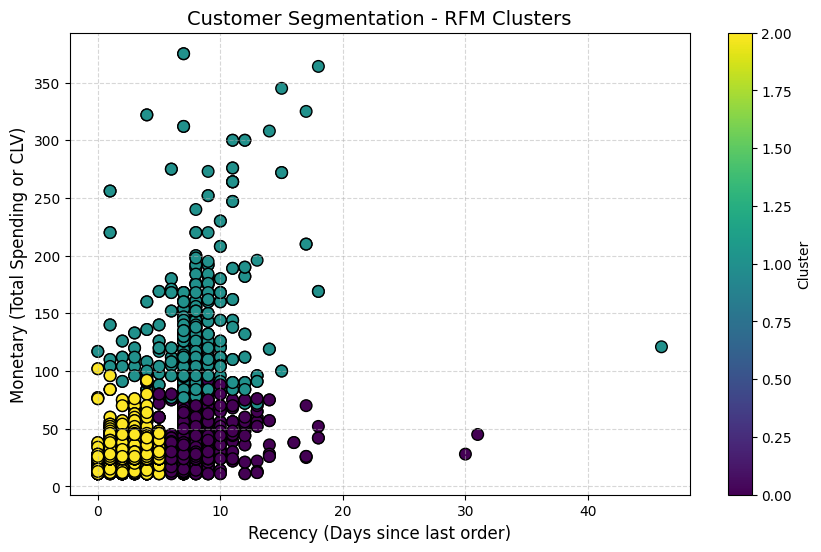

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot: Recency vs Monetary, colored by Cluster
plt.scatter(
    df_rfm['Recency'],
    df_rfm['Monetary'],
    c=df_rfm['Cluster'],
    cmap='viridis',
    edgecolor='k',
    s=70  # Size of points
)

plt.title('Customer Segmentation - RFM Clusters', fontsize=14)
plt.xlabel('Recency (Days since last order)', fontsize=12)
plt.ylabel('Monetary (Total Spending or CLV)', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


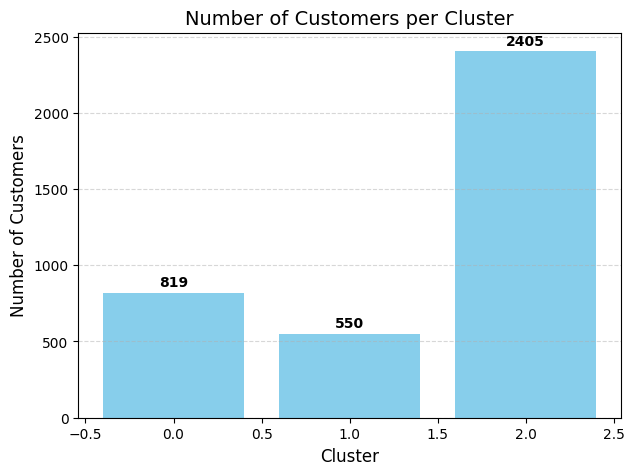

In [ ]:
import matplotlib.pyplot as plt

# Assuming cluster_counts is already created:
cluster_counts = rfm_behavior_df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(7, 5))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')

plt.title('Number of Customers per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        height + 20,                        # Y position (slightly above bar)
        f'{int(height)}',                   # Text (number)
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



In [ ]:
rfm_behavior_df.to_csv('customer_segments_final.csv', index=False)

